<a href="https://colab.research.google.com/github/rawnak344/Oral_Cancer-EDA-/blob/main/Rawnak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_excel('/content/Copy of Thesis.xlsx')
print(data.head())

   Name  Gender       Age Alcohol Smoke Use Tobaco Smoking Family  \
0     1    Male  Above 40      No    No         No             No   
1     2  Female  Above 40      No    No        Yes            Yes   
2     3    Male     30-50      No   Yes         No             No   
3     4  Female  Above 40      No    No         No             No   
4     5  Female  Above 40      No    No        Yes            Yes   

  Oral Hygiene Lack Nutrution papillomavirus Taking Betel Premalignent  \
0           No             No             No          Yes          Yes   
1          Yes             No             No          Yes          Yes   
2          Yes             No             No          Yes           No   
3          Yes             No             No          Yes           No   
4           No             No             No           No          Yes   

  Gene Mutation Sharp Tooth  
0            No          No  
1            No         Yes  
2            No          No  
3            No     

In [ ]:
data.drop(columns=['Name','Age'],inplace= True)

In [ ]:
from collections import Counter
count = {}
for i in data.columns:
    counter = Counter()
    value ={i:dict(Counter(data[i]))}
    count.update(value)

In [ ]:
count

{'Gender': {'Male': 287, 'Female': 458},
 'Alcohol': {'No': 677, 'Yes': 68},
 'Smoke': {'No': 430, 'Yes': 315},
 'Use Tobaco': {'No': 474, 'Yes': 271},
 'Smoking Family': {'No': 483, 'Yes': 262},
 'Oral Hygiene': {'No': 481, 'Yes': 264},
 'Lack Nutrution': {'No': 476, 'Yes': 269},
 'papillomavirus': {'No': 495, 'Yes': 250},
 'Taking Betel': {'Yes': 572, 'No': 173},
 'Premalignent': {'Yes': 260, 'No': 485},
 'Gene Mutation': {'No': 486, 'Yes': 259},
 'Sharp Tooth': {'No': 411, 'Yes': 334}}

In [ ]:
percent = {}
for key,value in count.items():
    y = list(value.keys())[0]
    z = list(value.keys())[1]
    x = list(value.values())
    percent1 = round(x[1]/sum(x)*100,2)
    percent2 = round(100- percent1,2)
    dictionary = {key:{y:percent1,
                       z:(percent2),
                       'Difference': round(abs(percent1-percent2),2)}}
    percent.update(dictionary)



In [ ]:
percent

{'Gender': {'Male': 61.48, 'Female': 38.52, 'Difference': 22.96},
 'Alcohol': {'No': 9.13, 'Yes': 90.87, 'Difference': 81.74},
 'Smoke': {'No': 42.28, 'Yes': 57.72, 'Difference': 15.44},
 'Use Tobaco': {'No': 36.38, 'Yes': 63.62, 'Difference': 27.24},
 'Smoking Family': {'No': 35.17, 'Yes': 64.83, 'Difference': 29.66},
 'Oral Hygiene': {'No': 35.44, 'Yes': 64.56, 'Difference': 29.12},
 'Lack Nutrution': {'No': 36.11, 'Yes': 63.89, 'Difference': 27.78},
 'papillomavirus': {'No': 33.56, 'Yes': 66.44, 'Difference': 32.88},
 'Taking Betel': {'Yes': 23.22, 'No': 76.78, 'Difference': 53.56},
 'Premalignent': {'Yes': 65.1, 'No': 34.9, 'Difference': 30.2},
 'Gene Mutation': {'No': 34.77, 'Yes': 65.23, 'Difference': 30.46},
 'Sharp Tooth': {'No': 44.83, 'Yes': 55.17, 'Difference': 10.34}}

In [ ]:
import matplotlib.pyplot as plt
name = list(percent.keys())[1:]
values =[y['Difference'] for x,y in list(percent.items())[1:]] 
print(name)

['Alcohol', 'Smoke', 'Use Tobaco', 'Smoking Family', 'Oral Hygiene', 'Lack Nutrution', 'papillomavirus', 'Taking Betel', 'Premalignent', 'Gene Mutation', 'Sharp Tooth']


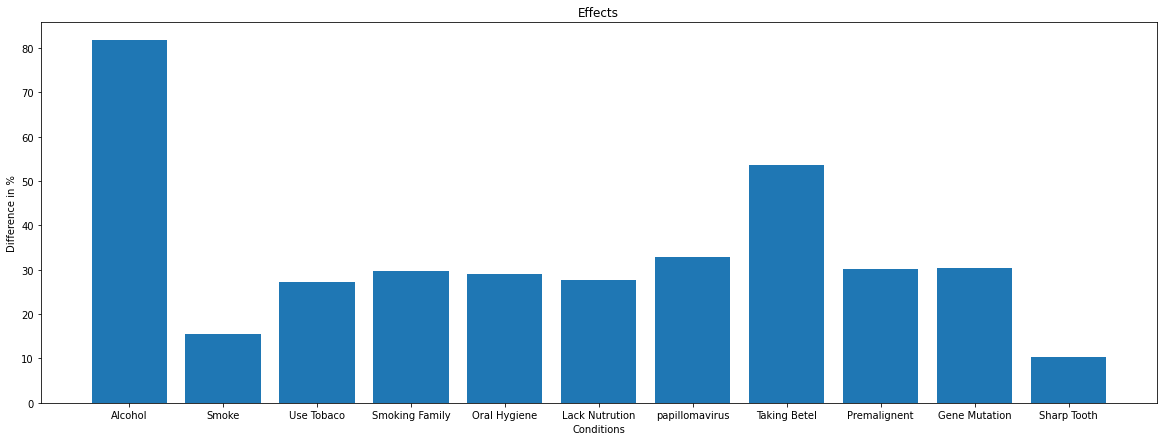

In [ ]:
plt_1 = plt.figure(figsize=(20, 7))
plt.bar(name, values)
plt.xlabel('Conditions')
plt.ylabel('Difference in %')
plt.title('Effects')
 
# To show this figure object, we use the line,
# fig.show()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
name2 = list(percent.keys())[1:]
values2 =[y['Yes'] for x,y in list(percent.items())[1:]] 
print(name)

['Alcohol', 'Smoke', 'Use Tobaco', 'Smoking Family', 'Oral Hygiene', 'Lack Nutrution', 'papillomavirus', 'Taking Betel', 'Premalignent', 'Gene Mutation', 'Sharp Tooth']


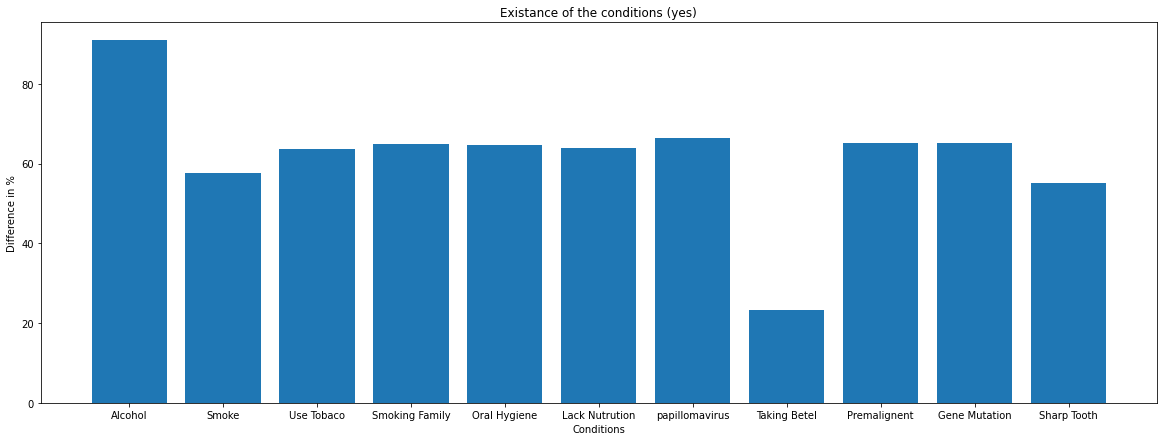

In [ ]:
plt_1 = plt.figure(figsize=(20, 7))
plt.bar(name2, values2)
plt.xlabel('Conditions')
plt.ylabel('Difference in %')
plt.title('Existance of the conditions (yes)')
 
# To show this figure object, we use the line,
# fig.show()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

for i in data.columns:
    data[i] = lb.fit_transform(data[i])
    

In [ ]:
xtrain = data.iloc[:372,:]
xtest = data.iloc[373:,:]

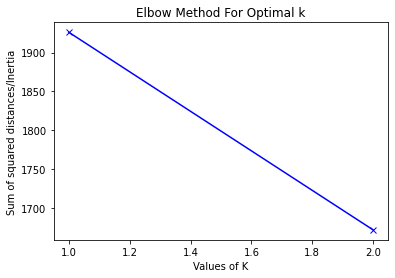

In [ ]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,3)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()
